In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df_match_time = pd.read_csv('match_time.csv')
df_match_time

,Unnamed: 0,match_id,total_peroid
0,0,12260075,7318.0
1,1,12260076,7827.0
2,2,12260077,10346.0
3,3,12260078,7171.0
4,4,12260080,5382.0
...,...,...,...
6109,9311,12384789,6819.0
6110,9312,12384806,10098.0
6111,9313,12384892,4063.0
6112,9314,12384975,14067.0


In [98]:
match_time_mean = df_match_time['total_peroid'].mean()
match_time_mean

np.float64(7337.49492966961)

In [99]:
df_surface_type = pd.read_csv('/home/mostafa2rz/Desktop/Tennis_project/202405/df_tournament.csv')
df_surface_type = df_surface_type[['match_id','ground_type']].drop_duplicates(subset='match_id')
df_surface_type

,match_id,ground_type
0,12315213,Red clay
1,12315541,Red clay
2,12313762,Red clay
3,12315387,Red clay
4,12311929,Red clay
...,...,...
18033,12293736,Hardcourt outdoor
18036,12292682,Red clay
18038,12292861,Red clay
18039,12293544,Hardcourt outdoor


In [100]:
df_match_time_with_surface_type = df_match_time[['match_id','total_peroid']].merge(df_surface_type[['match_id','ground_type']] , on='match_id',how='left')
df_match_time_with_surface_type

,match_id,total_peroid,ground_type
0,12260075,7318.0,Red clay
1,12260076,7827.0,Red clay
2,12260077,10346.0,Red clay
3,12260078,7171.0,Red clay
4,12260080,5382.0,Red clay
...,...,...,...
6109,12384789,6819.0,Hardcourt outdoor
6110,12384806,10098.0,Red clay
6111,12384892,4063.0,Red clay
6112,12384975,14067.0,Red clay


<Axes: xlabel='match_id', ylabel='total_peroid'>

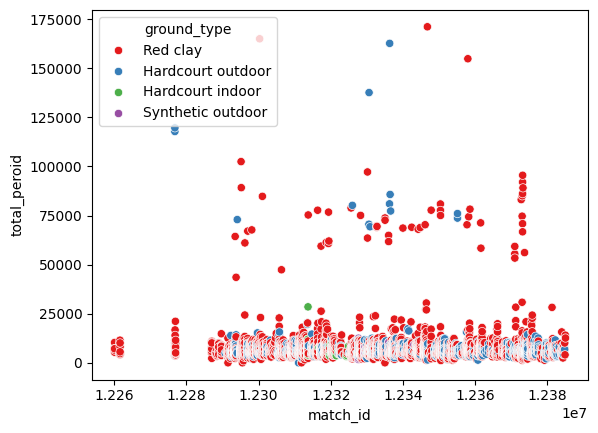

In [101]:

sns.scatterplot(x='match_id', y='total_peroid', hue='ground_type', data=df_match_time_with_surface_type, palette='Set1')


In [102]:
df_match_time_with_surface_type_1 = df_match_time_with_surface_type.groupby('ground_type')['total_peroid'].count().reset_index()
df_match_time_with_surface_type_2 = df_match_time_with_surface_type.groupby('ground_type')['total_peroid'].mean().reset_index()
df_match_time_with_surface_type = df_match_time_with_surface_type_1.merge(df_match_time_with_surface_type_2,on='ground_type').rename(columns={'total_peroid_x': 'number_of_match', 'total_peroid_y': 'match_time_mean'})
df_match_time_with_surface_type.sort_values(by='match_time_mean')


,ground_type,number_of_match,match_time_mean
3,Synthetic outdoor,45,6068.733333
0,Hardcourt indoor,68,6282.779412
1,Hardcourt outdoor,1438,7117.796245
2,Red clay,4563,7434.961867


Because the available data for two levels is very small, it is not possible to correctly analyze with much confidence, but in general, the average for all group_type is upper